In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
csv_filepath = "sumo_offline_rl_data.csv"
df = pd.read_csv(csv_filepath)
print(df.head())

   state_N  state_S  state_E  state_W  action  reward  next_state_N  \
0        0        1        1        1       0   -0.14             0   
1        0        1        1        1       0   -0.23             0   
2        0        0        1        1       1   -0.21             0   
3        0        0        1        1       0   -0.18             0   
4        0        1        2        1       0   -0.36             0   

   next_state_S  next_state_E  next_state_W   done  
0             1             1             1  False  
1             0             1             1  False  
2             1             1             1  False  
3             0             1             1  False  
4             1             2             1  False  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_N       3283 non-null   int64  
 1   state_S       3283 non-null   int64  
 2   state_E       3283 non-null   int64  
 3   state_W       3283 non-null   int64  
 4   action        3283 non-null   int64  
 5   reward        3283 non-null   float64
 6   next_state_N  3283 non-null   int64  
 7   next_state_S  3283 non-null   int64  
 8   next_state_E  3283 non-null   int64  
 9   next_state_W  3283 non-null   int64  
 10  done          3283 non-null   bool   
dtypes: bool(1), float64(1), int64(9)
memory usage: 259.8 KB


In [5]:
state_cols = ['state_N', 'state_S', 'state_E', 'state_W']
next_state_cols = ['next_state_N', 'next_state_S', 'next_state_E', 'next_state_W']

df['state_tuple'] = df[state_cols].apply(tuple, axis=1)
df['next_state_tuple'] = df[next_state_cols].apply(tuple, axis=1)

num_unique_states = df['state_tuple'].nunique()
print(f"Number of unique states (s): {num_unique_states}")
num_unique_next_states = df['next_state_tuple'].nunique()
print(f"Number of unique next_states (s'): {num_unique_next_states}")

print("\nTop 10 most frequent states (s):")
top_states = df['state_tuple'].value_counts().nlargest(10)
print(top_states)
print(f"\nPercentage covered by top 10 states: {top_states.sum() / len(df) * 100:.2f}%")

Number of unique states (s): 10
Number of unique next_states (s'): 9

Top 10 most frequent states (s):
state_tuple
(0, 3, 2, 1)    3225
(0, 1, 2, 1)      19
(0, 2, 2, 1)      14
(1, 3, 2, 1)       9
(0, 3, 1, 1)       4
(0, 1, 1, 1)       3
(0, 0, 1, 1)       3
(0, 0, 2, 1)       3
(0, 2, 1, 1)       2
(1, 2, 2, 1)       1
Name: count, dtype: int64

Percentage covered by top 10 states: 100.00%


C:\Users\kfhan\AppData\Local\Temp\ipykernel_35756\4028134077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='state_N', data=df, ax=axes_states[0, 0], palette="viridis").set_title('North Approach Congestion')
C:\Users\kfhan\AppData\Local\Temp\ipykernel_35756\4028134077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='state_S', data=df, ax=axes_states[0, 1], palette="viridis").set_title('South Approach Congestion')
C:\Users\kfhan\AppData\Local\Temp\ipykernel_35756\4028134077.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplo


Plot saved: state_component_distribution.png


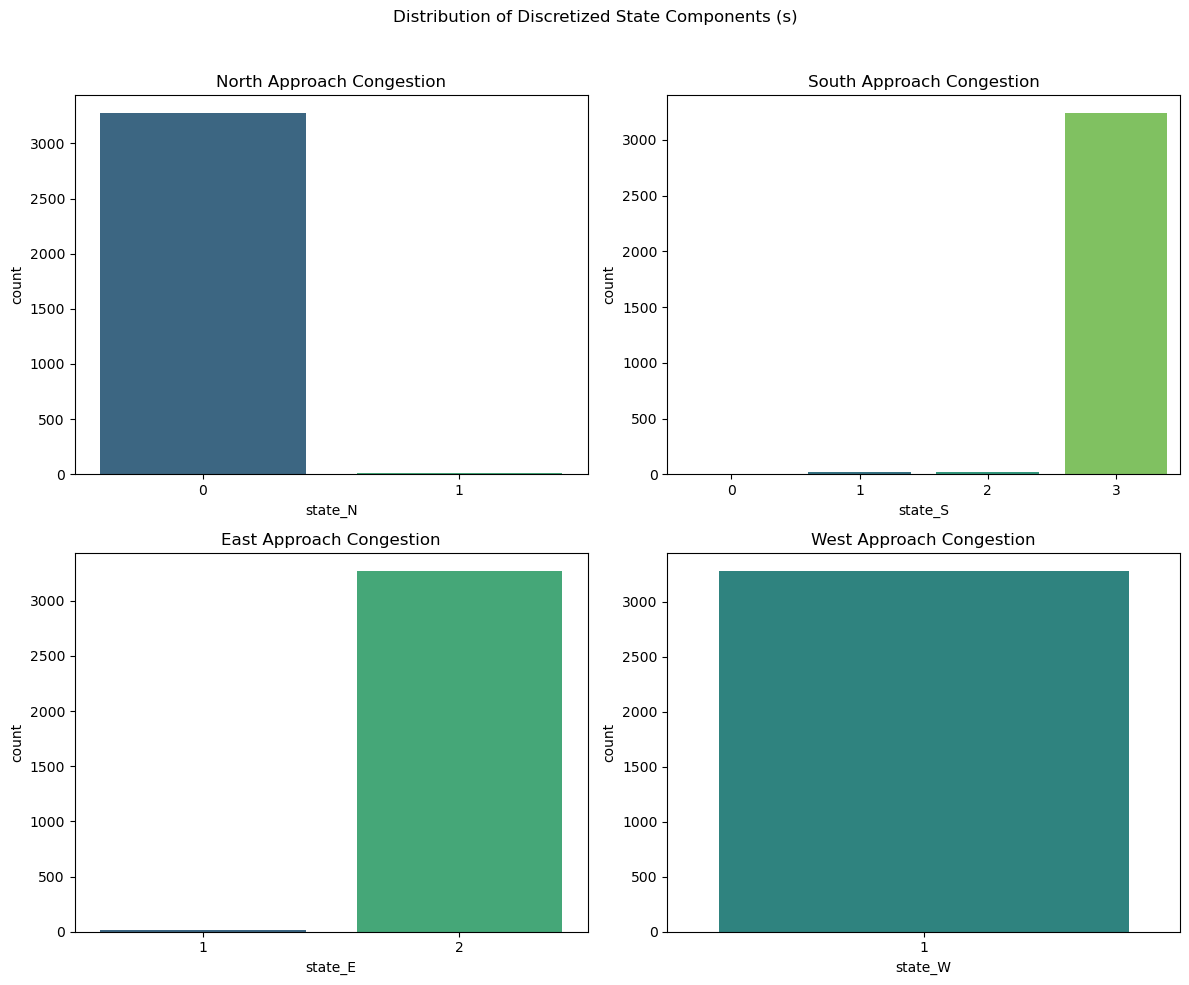

In [6]:
# Distribution of individual state components
fig_states, axes_states = plt.subplots(2, 2, figsize=(12, 10))
fig_states.suptitle('Distribution of Discretized State Components (s)')
sns.countplot(x='state_N', data=df, ax=axes_states[0, 0], palette="viridis").set_title('North Approach Congestion')
sns.countplot(x='state_S', data=df, ax=axes_states[0, 1], palette="viridis").set_title('South Approach Congestion')
sns.countplot(x='state_E', data=df, ax=axes_states[1, 0], palette="viridis").set_title('East Approach Congestion')
sns.countplot(x='state_W', data=df, ax=axes_states[1, 1], palette="viridis").set_title('West Approach Congestion')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("state_component_distribution.png")
print("\nPlot saved: state_component_distribution.png")

Action distribution (%):
action
0    50.319829
1    49.680171
Name: proportion, dtype: float64
Plot saved: action_distribution.png


C:\Users\kfhan\AppData\Local\Temp\ipykernel_35756\660604540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='action', data=df, palette="pastel").set_title('Action Distribution')


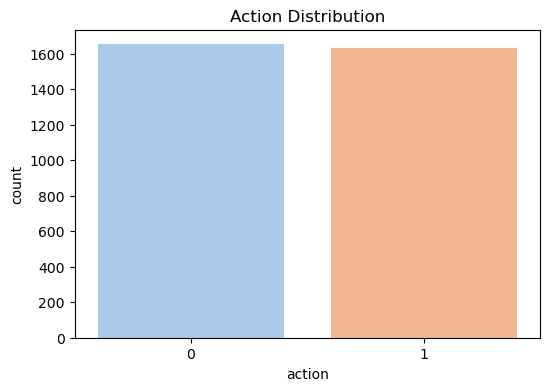

In [7]:
action_counts = df['action'].value_counts(normalize=True) * 100
print("Action distribution (%):")
print(action_counts)
plt.figure(figsize=(6, 4))
sns.countplot(x='action', data=df, palette="pastel").set_title('Action Distribution')
plt.savefig("action_distribution.png")
print("Plot saved: action_distribution.png")

Reward statistics:
count    3283.000000
mean       -0.684931
std         0.311817
min        -2.780000
25%        -0.700000
50%        -0.700000
75%        -0.700000
max         9.220000
Name: reward, dtype: float64

Percentage of positive rewards (>0): 1.01%
Percentage of negative rewards (<0): 98.99%
Percentage of zero rewards (==0): 0.00%
Plot saved: reward_distribution.png


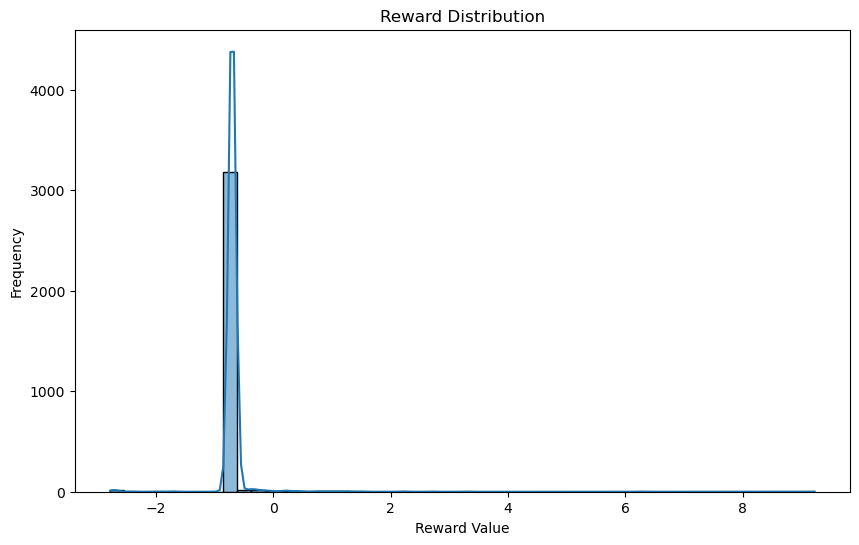

In [8]:
print("Reward statistics:")
print(df['reward'].describe())

positive_rewards_perc = (df['reward'] > 0).sum() / len(df) * 100
negative_rewards_perc = (df['reward'] < 0).sum() / len(df) * 100
zero_rewards_perc = (df['reward'] == 0).sum() / len(df) * 100
print(f"\nPercentage of positive rewards (>0): {positive_rewards_perc:.2f}%")
print(f"Percentage of negative rewards (<0): {negative_rewards_perc:.2f}%")
print(f"Percentage of zero rewards (==0): {zero_rewards_perc:.2f}%")

plt.figure(figsize=(10, 6))
sns.histplot(df['reward'], bins=50, kde=True).set_title('Reward Distribution')
plt.xlabel("Reward Value")
plt.ylabel("Frequency")
# Consider clipping for visualization if there are extreme outliers
# reward_clipped = np.clip(df['reward'], df['reward'].quantile(0.01), df['reward'].quantile(0.99))
# sns.histplot(reward_clipped, bins=50, kde=True).set_title('Reward Distribution (Clipped 1%-99%)')
plt.savefig("reward_distribution.png")
print("Plot saved: reward_distribution.png")

In [9]:
done_counts = df['done'].value_counts(normalize=True) * 100
print("'Done' flag distribution (%):")
print(done_counts)

'Done' flag distribution (%):
done
False    100.0
Name: proportion, dtype: float64


In [10]:
df['state_action_pair'] = df.apply(lambda row: (row['state_tuple'], row['action']), axis=1)
num_unique_state_action_pairs = df['state_action_pair'].nunique()
print(f"Number of unique state-action pairs: {num_unique_state_action_pairs}")
print("\nTop 10 most frequent state-action pairs:")
print(df['state_action_pair'].value_counts().nlargest(10))

Number of unique state-action pairs: 15

Top 10 most frequent state-action pairs:
state_action_pair
((0, 3, 2, 1), 0)    1628
((0, 3, 2, 1), 1)    1597
((0, 1, 2, 1), 1)      11
((0, 2, 2, 1), 1)      10
((1, 3, 2, 1), 1)       9
((0, 1, 2, 1), 0)       8
((0, 2, 2, 1), 0)       4
((0, 3, 1, 1), 0)       4
((0, 1, 1, 1), 0)       3
((0, 0, 1, 1), 0)       2
Name: count, dtype: int64
